In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries for data processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [27]:
# Display the path of the file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [28]:
data = pd.read_csv('heart.csv',sep= ';')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
data.shape

(303, 14)

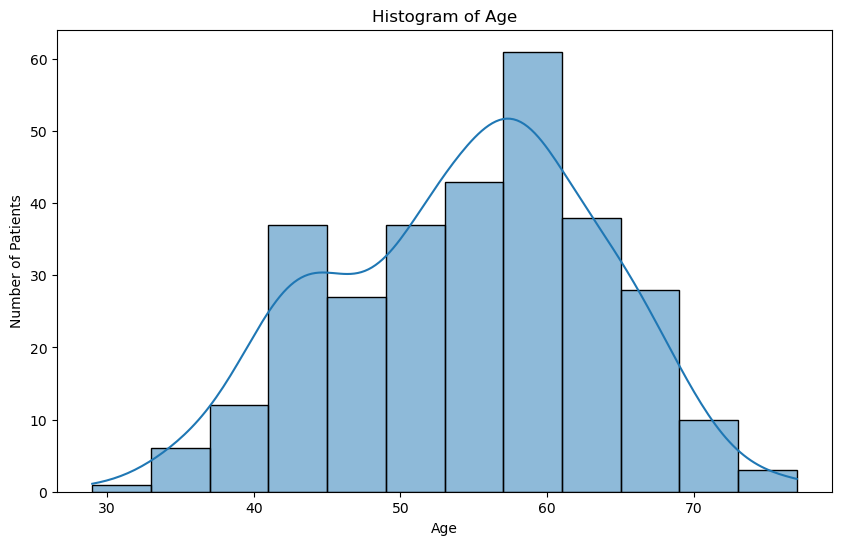

In [33]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(data['age'], kde=True)

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

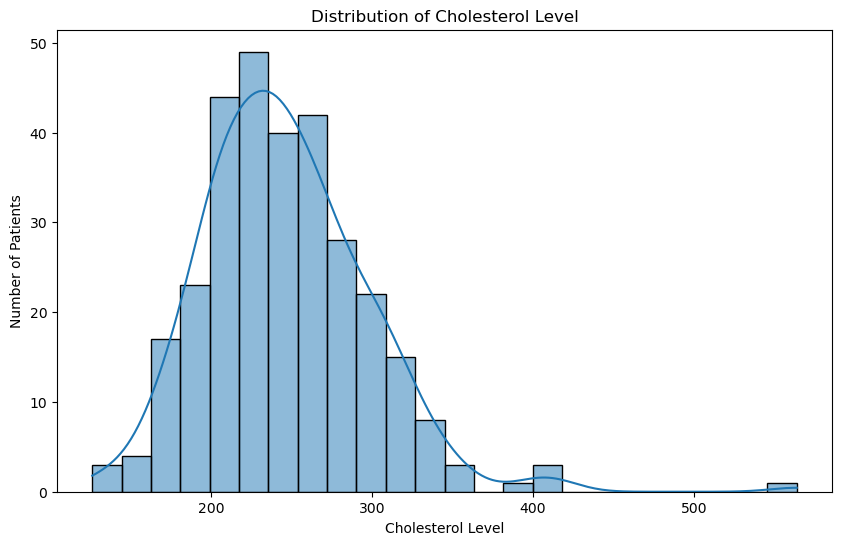

In [34]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(data['chol'], kde=True)

# Add title and labels
plt.title('Distribution of Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

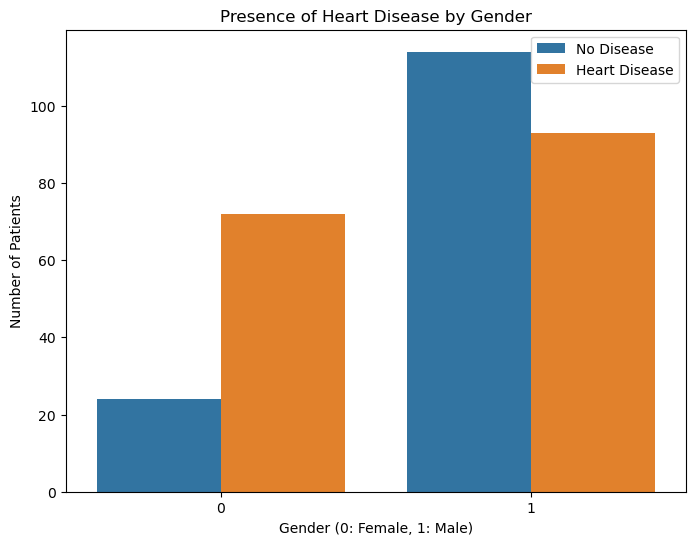

In [35]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a countplot using Seaborn
sns.countplot(x='sex', data=data, hue='target')

# Add title and labels
plt.title('Presence of Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Number of Patients')
plt.legend(['No Disease', 'Heart Disease'])

# Show the plot
plt.show()

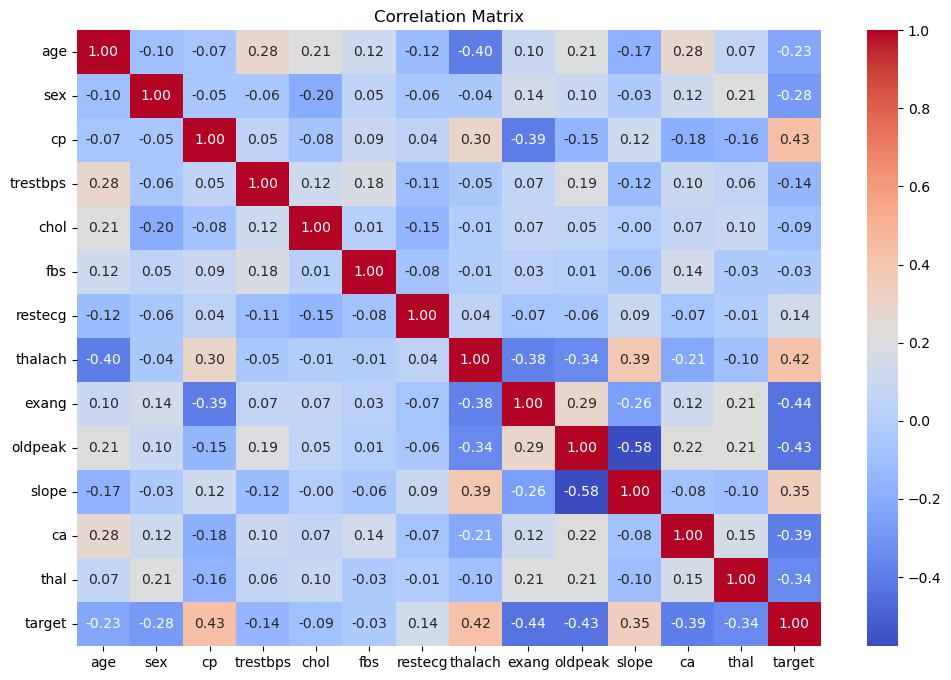

In [36]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

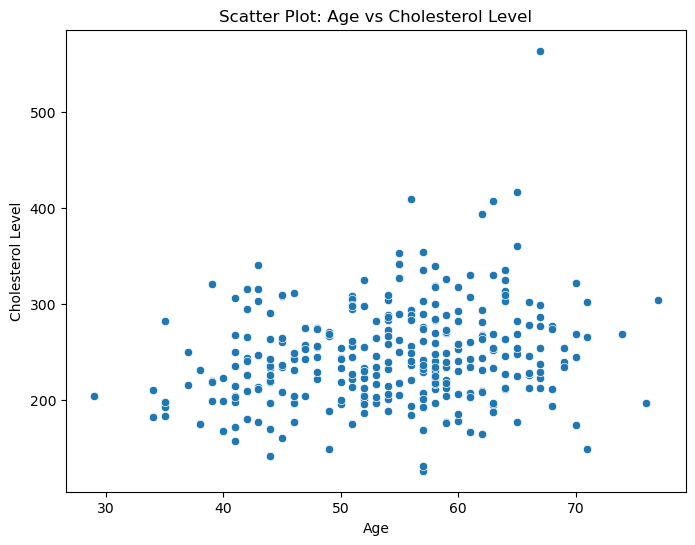

In [37]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot using Seaborn
sns.scatterplot(x='age', y='chol', data=data)

# Add title and labels
plt.title('Scatter Plot: Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')

# Show the plot
plt.show()

C:\Users\Saishen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


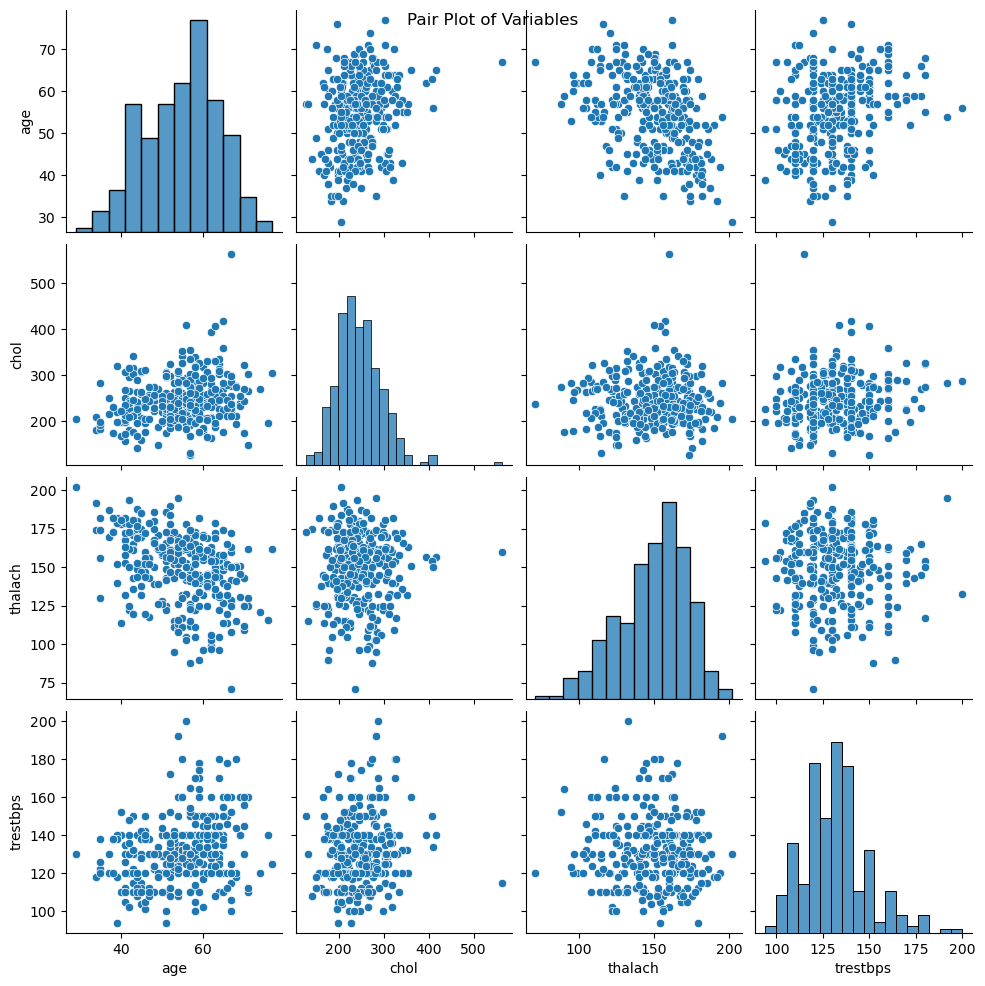

In [38]:
# Create a pair plot using Seaborn
sns.pairplot(data[['age', 'chol', 'thalach', 'trestbps']])

# Add a title
plt.suptitle('Pair Plot of Variables')

# Show the plot
plt.show()

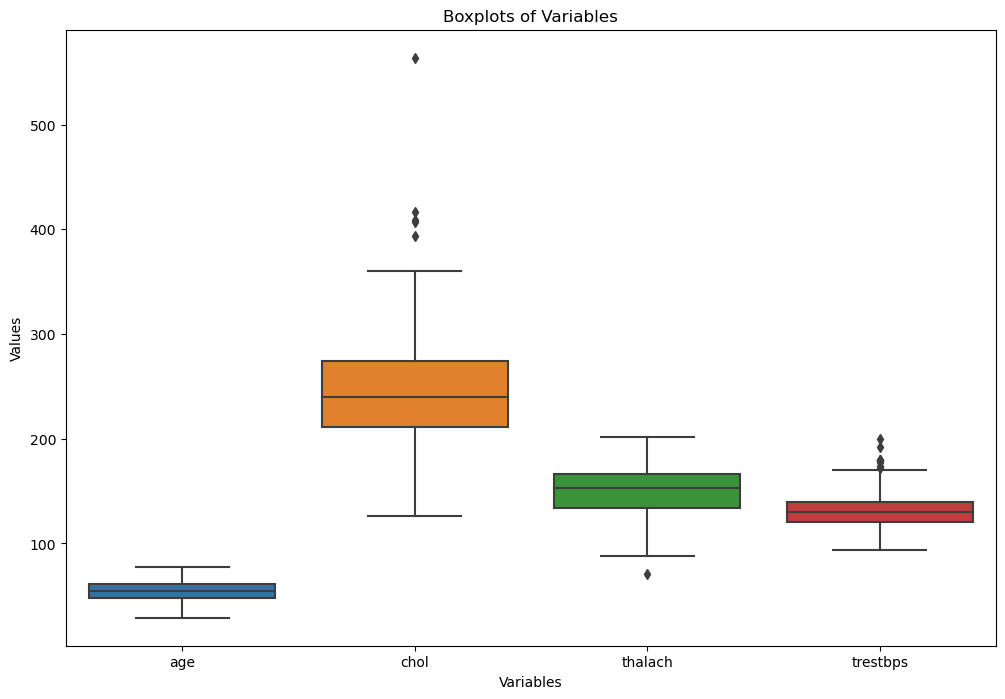

In [39]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=data[['age', 'chol', 'thalach', 'trestbps']])

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

<Axes: >

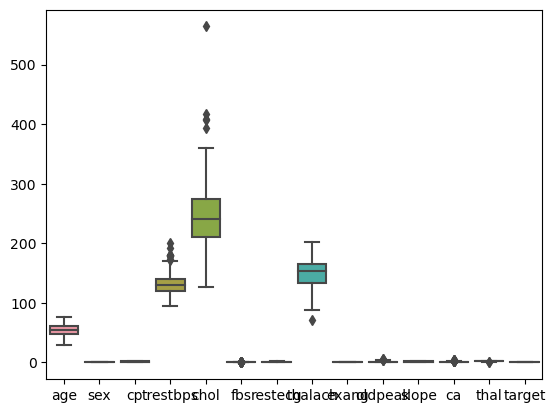

In [40]:
sns.boxplot(data=data)

In [41]:
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].mean(), data[col])

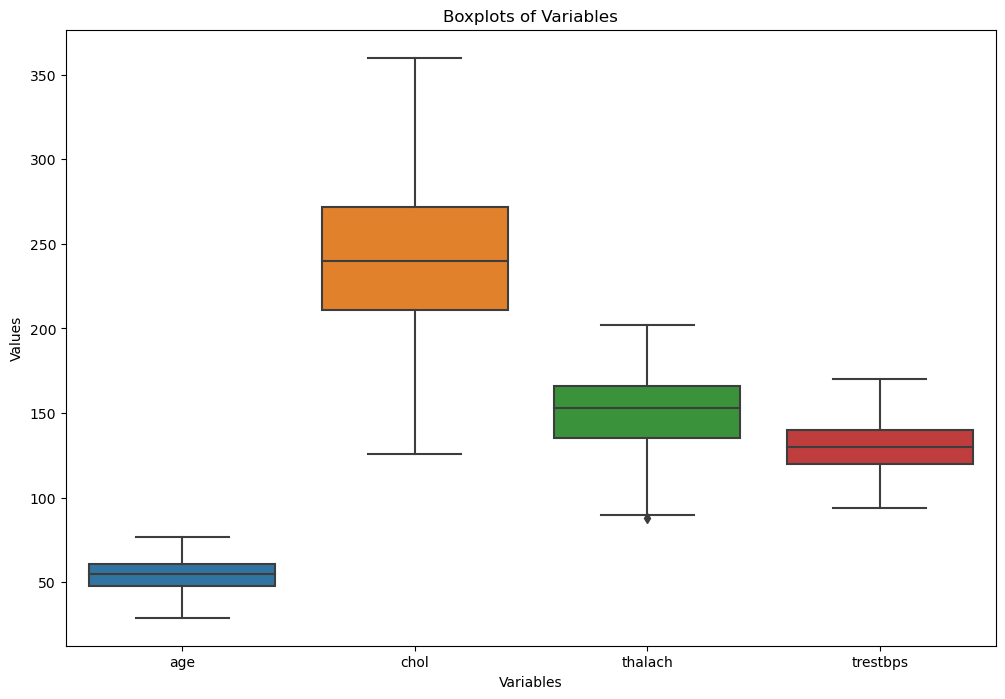

In [42]:
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=data[['age', 'chol', 'thalach', 'trestbps']])

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

In [43]:
# selects columns with data types 'object', which typically represents categorical variables. 
# The tolist() method converts the column names to a list
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

#  selects columns with data types 'int' and 'float', which represent numerical variables.
numerical_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()

# print the list of categorical column names.
print("Categorical column:", categorical_cols)

#  print the list of numerical column names.
print("Numerical column:", numerical_cols)

Categorical column: []
Numerical column: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [44]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [45]:
df_processed = data.copy()

scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

In [46]:
label_encoder = LabelEncoder()
df_processed[categorical_cols] = df_processed[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

In [47]:
features = df_processed.drop('target', axis=1)
target = df_processed['target']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [49]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(f'The shape of training features is: {X_train.shape}')
print(f'The shape of training target is: {y_train.shape}')

print(f'The shape of testing features is: {X_test.shape}')
print(f'The shape of testing target is: {y_test.shape}')

The shape of training features is: (242, 13)
The shape of training target is: (242,)
The shape of testing features is: (61, 13)
The shape of testing target is: (61,)


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiation of the 5-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier on the training data
knn.fit(X_train, y_train)

# Prediction on the test data
y_pred = knn.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculation of precision
precision = precision_score(y_test, y_pred)

# Calculation of recall
recall = recall_score(y_test, y_pred)

# Calculation of F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1 Score: 86.15%


In [52]:
results = []

# Testing different values of k from 1 to 10
for k in range(1, 11):
    # Instantiation of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Training the classifier on the training data
    knn.fit(X_train, y_train)

    # Prediction on the test data
    y_pred = knn.predict(X_test)

    # Calculation of accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Adding results to the list
    results.append((k, accuracy))

# Creating a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['k', 'Accuracy'])

# Displaying the results table
print(results_df)

    k  Accuracy
0   1  0.803279
1   2  0.803279
2   3  0.852459
3   4  0.836066
4   5  0.852459
5   6  0.836066
6   7  0.868852
7   8  0.819672
8   9  0.868852
9  10  0.836066


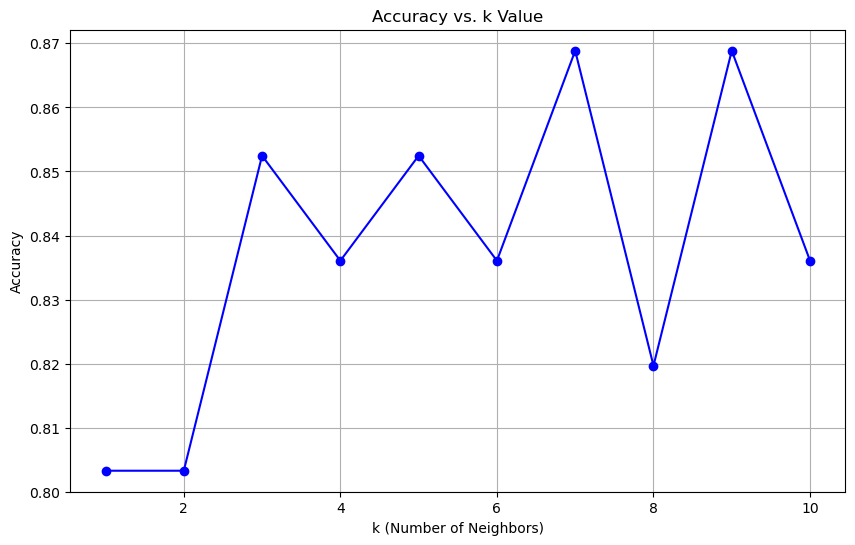

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [54]:
from sklearn.decomposition import PCA

# Select features for PCA
features = data.drop('target', axis=1)

# Perform data preprocessing by normalizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

In [55]:
from sklearn.cluster import KMeans

# Assuming X is the data matrix
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_test)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
from sklearn.cluster import KMeans


# instanciate the  k-means cluster and fit the data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

# Get cluster assignments and centroids
cluster_labels_kmean = kmeans.labels_

# Display the cluster for the first observations
print(cluster_labels_kmean[:10])

# Display the the first observations of the real label
print(target[:10])

C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 0 0 0 1 0 1 1 0 0]
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: target, dtype: float64


C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

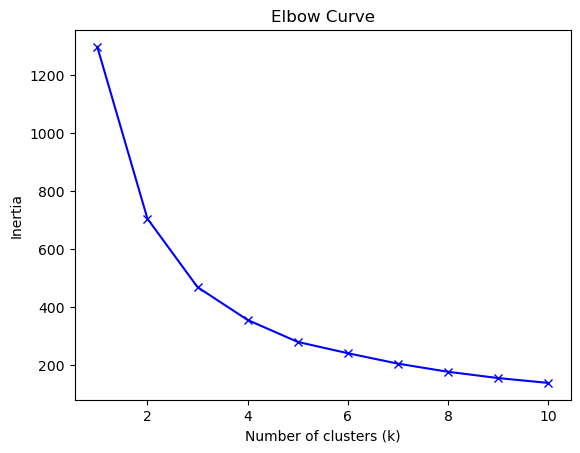

In [57]:
# Calculate inertia for different values of k
inertias = []
k_values = range(1, 11)  # Test from 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertias.append(kmeans.inertia_)

# Display the elbow curve
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [58]:
# Apply the pca_result for the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_result)

# Get cluster assignments and centroids
cluster_labels_pca = kmeans.labels_
centroids_pca = kmeans.cluster_centers_

# Display the cluster for the first observations
print(cluster_labels_pca[:10])

# Display the the first observations of the real label
print(target[:10])

C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saishen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1]
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: target, dtype: float64


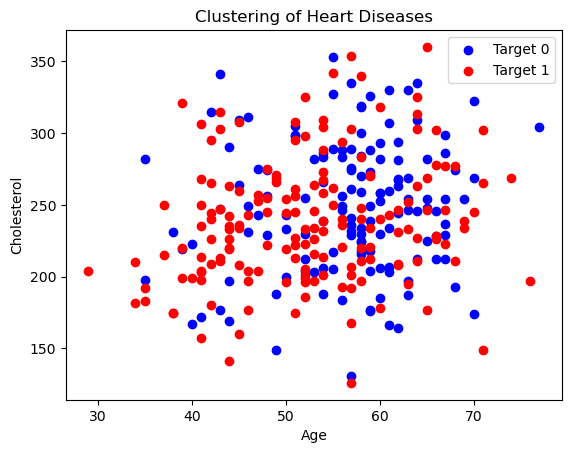

In [59]:
# Add cluster labels to the dataframe
data['Cluster_kmean2'] = cluster_labels_kmean

# Split the data based on the target variable
target_kmean_0 = data[data['target'] == 0]
target_kmean_1 = data[data['target'] == 1]

# Create a scatter plot for the clusters
plt.scatter(target_kmean_0['age'], target_kmean_0['chol'], c='blue', label='Target 0')
plt.scatter(target_kmean_1['age'], target_kmean_1['chol'], c='red', label='Target 1')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Clustering of Heart Diseases')
plt.legend()
plt.show()

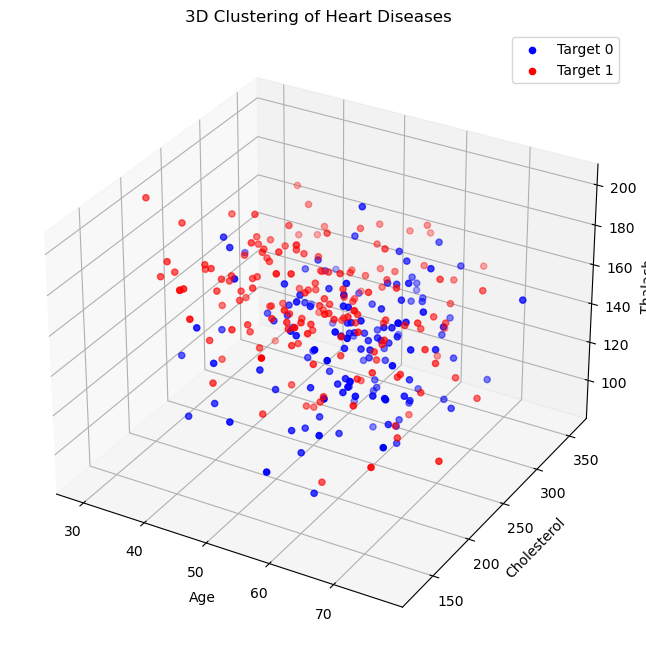

In [60]:
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools

# Add cluster labels to the dataframe
data['Cluster_kmean3'] = cluster_labels_kmean

# Create a 3D scatter plot for the clusters using three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[data['target'] == 0]['age'], data[data['target'] == 0]['chol'], data[data['target'] == 0]['thalach'], c='blue', label='Target 0')
ax.scatter(data[data['target'] == 1]['age'], data[data['target'] == 1]['chol'], data[data['target'] == 1]['thalach'], c='red', label='Target 1')

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Thalach')
ax.set_title('3D Clustering of Heart Diseases')
ax.legend()

plt.show()

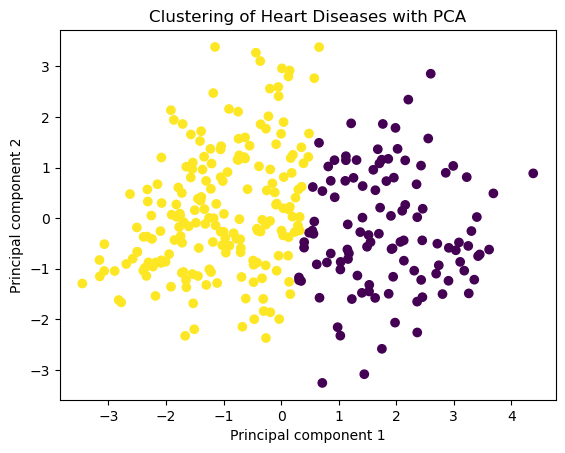

In [61]:
# Add cluster labels to the dataframe
data['Cluster_pca'] = cluster_labels_pca

# Split the data based on the target variable
cluster_pca_0 = data[data['Cluster_pca'] == 0]
cluster_pca_1 = data[data['Cluster_pca'] == 1]

# Create a scatter plot for the clusters on the principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels_pca)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Clustering of Heart Diseases with PCA')
plt.show()